Autor: Nathan Torquato Mimoso (Hash 71)

# PMR3508 - Tarefa 1

Nesta primeira tarefa, será realizado o processamento da base Adult. Inicialmente, a base será explorada e alguns dados serão visualizados em busca de seu entendimento. Depois, os dados faltantes serão tratados e prosseguirei à produção de um classificador kNN para a variável _Income_.

## 1. Importando as ferramentas e os dados

In [1]:
#Importando as bibliotecas
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importando os dados
adult = pd.read_csv("../input/adult-pmr3508/train_data.csv", skipinitialspace = True, na_values = "?")
adult.set_index('Id',inplace=True)
adult.columns = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_num', 'Marital_status', 'Occupation', 
                 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country', 'Income']

## 2. Análise exploratória

In [3]:
adult.shape

(32560, 15)

In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 16280 to 48839
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         30724 non-null object
fnlwgt            32560 non-null int64
Education         32560 non-null object
Education_num     32560 non-null int64
Marital_status    32560 non-null object
Occupation        30717 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Sex               32560 non-null object
Capital_gain      32560 non-null int64
Capital_loss      32560 non-null int64
Hours_per_week    32560 non-null int64
Native_country    31977 non-null object
Income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [5]:
adult.head()

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [6]:
adult.describe(include='all')

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,30724,3.256000e+04,32560,32560.000000,32560,30717,32560,32560,32560,32560.000000,32560.000000,32560.000000,31977,32560
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [7]:
adult.corr()

,Age,fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


Os gráficos a seguir ilustram a distribuição das variáveis

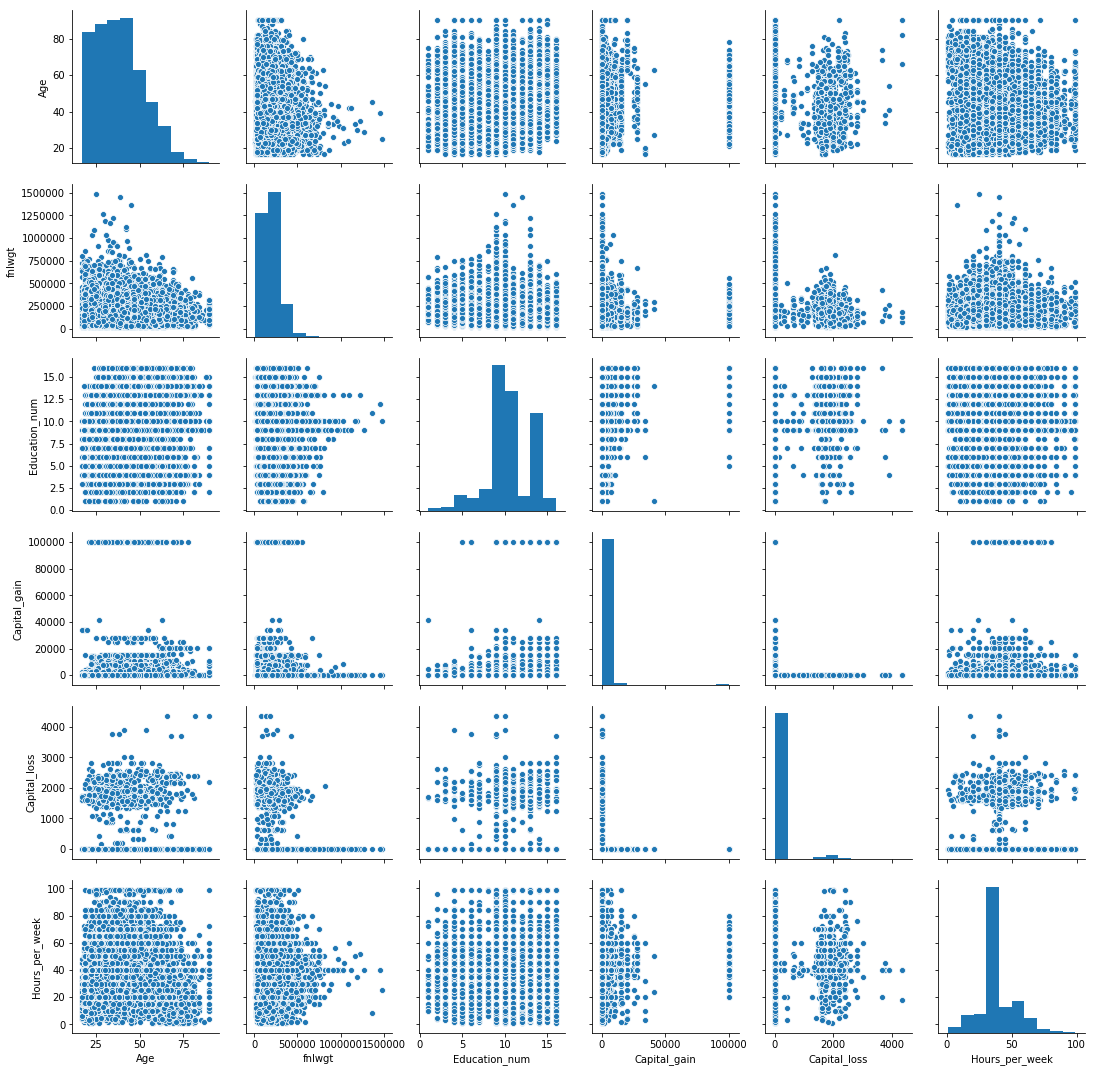

In [8]:
sns.pairplot(adult)

Text(0, 0.5, 'Frequency')

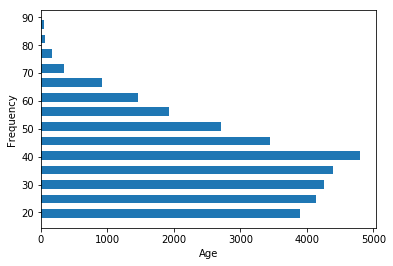

In [9]:
plt.hist(adult.Age, bins=int((adult.Age.max()-adult.Age.min())/5), orientation='horizontal', rwidth=.6)
plt.xlabel("Age")
plt.ylabel("Frequency")

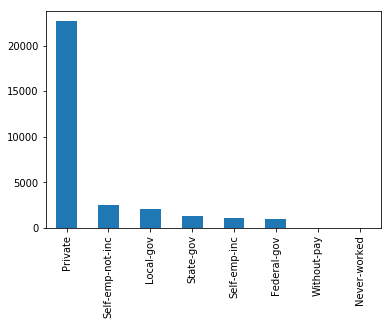

In [10]:
adult.Workclass.value_counts().plot(kind='bar')

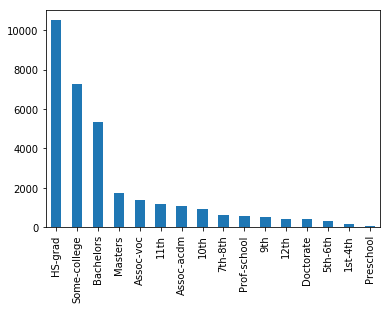

In [11]:
adult.Education.value_counts().plot(kind='bar')

Text(0, 0.5, 'Frequency')

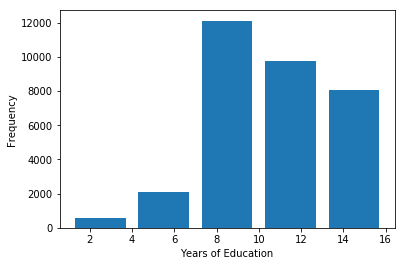

In [12]:
plt.hist(adult.Education_num, bins=int((adult.Education_num.max()-adult.Education_num.min())/3), rwidth=.8)
plt.xlabel("Years of Education")
plt.ylabel("Frequency")

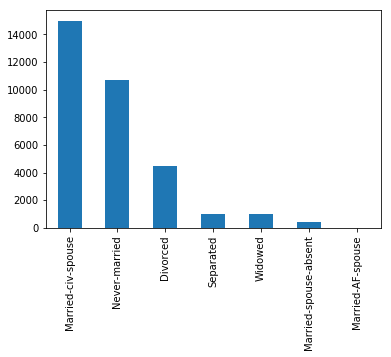

In [13]:
adult.Marital_status.value_counts().plot(kind='bar')

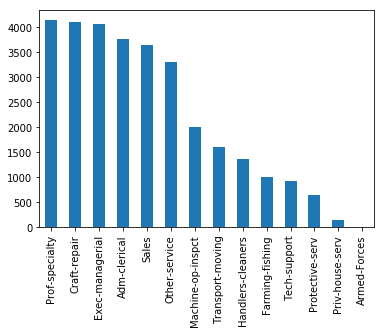

In [14]:
adult.Occupation.value_counts().plot(kind='bar')

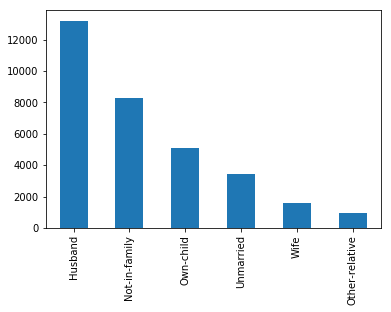

In [15]:
adult.Relationship.value_counts().plot(kind='bar')

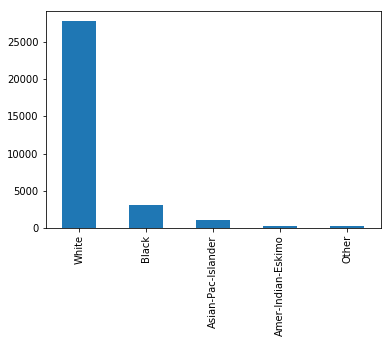

In [16]:
adult.Race.value_counts().plot(kind='bar')

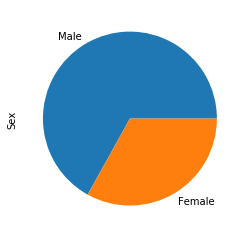

In [17]:
adult.Sex.value_counts().plot(kind='pie')

Text(0, 0.5, 'Frequency')

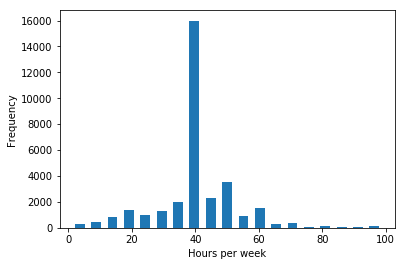

In [18]:
plt.hist(adult.Hours_per_week, bins=int((adult.Hours_per_week.max()-adult.Hours_per_week.min())/5), rwidth=.6)
plt.xlabel("Hours per week")
plt.ylabel("Frequency")

In [19]:
adult.Native_country.value_counts()

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

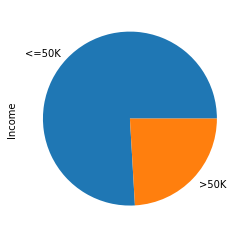

In [20]:
adult.Income.value_counts().plot(kind='pie')

Agora avaliaremos quanto alguns atributos explicam a variação da renda.

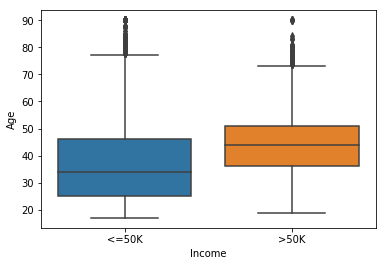

In [21]:
sns.boxplot(x='Income', y='Age', data=adult)

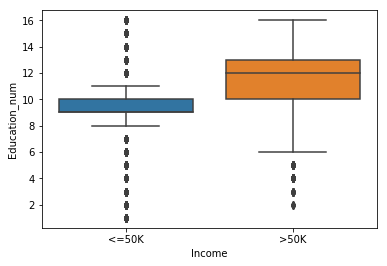

In [22]:
sns.boxplot(x='Income', y='Education_num', data=adult)

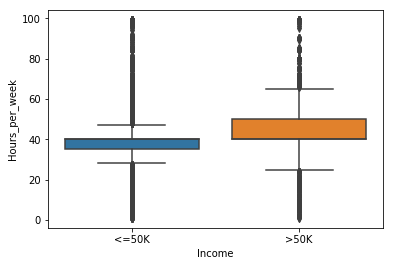

In [23]:
sns.boxplot(x='Income', y='Hours_per_week', data=adult)

A função abaixo permite verificar a proporção entre indivíduos com renda <=50K e >50K

In [24]:
def freq(column):
    return column*100//float(column[-1])

In [25]:
Income_Sex = pd.crosstab(adult.Income, adult.Occupation, margins=True)
Income_Sex.apply(freq, axis=0)

Occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
Income,,,,,,,,,,,,,,,
<=50K,86.0,88.0,77.0,51.0,88.0,93.0,87.0,95.0,99.0,55.0,67.0,73.0,69.0,79.0,75.0
>50K,13.0,11.0,22.0,48.0,11.0,6.0,12.0,4.0,0.0,44.0,32.0,26.0,30.0,20.0,24.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [26]:
Income_Sex = pd.crosstab(adult.Income, adult.Sex, margins=True)
Income_Sex.apply(freq, axis=0)

Sex,Female,Male,All
Income,,,
<=50K,89.0,69.0,75.0
>50K,10.0,30.0,24.0
All,100.0,100.0,100.0


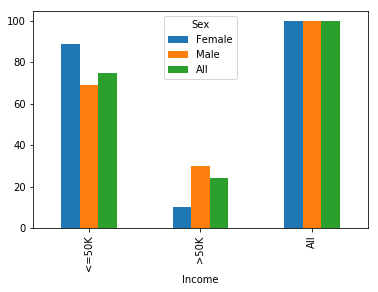

In [27]:
Income_Sex.apply(freq, axis=0).plot(kind="bar")

In [28]:
Income_Race = pd.crosstab(adult.Income, adult.Race, margins=True)
Income_Race.apply(freq, axis=0)

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
Income,,,,,,
<=50K,88.0,73.0,87.0,90.0,74.0,75.0
>50K,11.0,26.0,12.0,9.0,25.0,24.0
All,100.0,100.0,100.0,100.0,100.0,100.0


In [29]:
Income_Country = pd.crosstab(adult.Income, adult.Native_country, margins=True)
Income_Country.apply(freq, axis=0)

Native_country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,All
Income,,,,,,,,,,,,,,,,,,,,,
<=50K,63.0,67.0,73.0,96.0,73.0,97.0,85.0,91.0,66.0,58.0,...,89.0,75.0,80.0,60.0,83.0,89.0,75.0,92.0,62.0,75.0
>50K,36.0,32.0,26.0,3.0,26.0,2.0,14.0,8.0,33.0,41.0,...,10.0,25.0,20.0,39.0,16.0,10.0,24.0,7.0,37.0,24.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


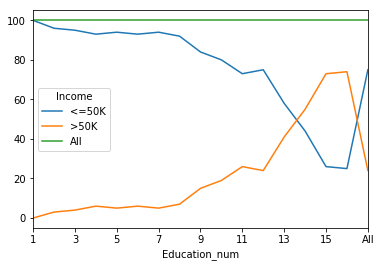

In [30]:
Income_Education = pd.crosstab(adult.Education_num, adult.Income, margins=True)
Income_Education.apply(freq, axis=1).plot()

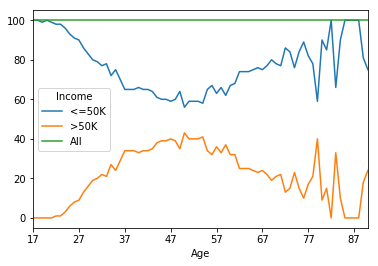

In [31]:
Income_Age = pd.crosstab(adult.Age, adult.Income, margins=True)
Income_Age.apply(freq, axis=1).plot()

Como era esperado, a renda é tanto maior quanto maior a idade, o número de anos de estudo e as horas de trabalho semanais. Além disso, há influência de atributos como raça, sexo e país nativo.

## 3. Tratando _missing values_

In [32]:
adult.isna()

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Id,,,,,,,,,,,,,,,
16280,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16281,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16282,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16283,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16284,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48836,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
adult.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Como há relativamente poucos missing values, optou-se por removê-los.

In [34]:
train = adult.dropna()
train.shape

(30161, 15)

## 4. Ajuste do algoritmo kNN

### 4.1 Importando a base de testes

In [35]:
df = pd.read_csv('../input/adult-pmr3508/test_data.csv')
df.set_index('Id',inplace=True)
test = df.dropna()
test.columns = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_num', 'Marital_status', 'Occupation', 
                 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']
test.shape

(16280, 14)

In [36]:
test.head()

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
Id,,,,,,,,,,,,,,
0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


### 4.2 Selecionando o melhor hiperparâmetro k

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Inicialmente optou-se por fazer a análise somente através das variáveis numéricas.

In [38]:
Xtrain = train[["Age","Education_num","Capital_gain", "Capital_loss", "Hours_per_week"]]
Ytrain = train.Income
Xtest = test[["Age","Education_num","Capital_gain", "Capital_loss", "Hours_per_week"]]

In [39]:
# O código a seguir foi usado para avaliar qual hiperparâmetro k fornecia a maior acurácia média
'''for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, Xtrain, Ytrain, cv=10)
    knn.fit(Xtrain, Ytrain)
    Ypred = knn.predict(Xtest)
    print(i, 'Cross validation: ', scores, 'Média: ', cross_val_score(knn, Xtrain, Ytrain, cv=10).mean(), 'Previsão: ', Ypred, '\n')
'''

"for i in range(1, 31):\n    knn = KNeighborsClassifier(n_neighbors=i)\n    scores = cross_val_score(knn, Xtrain, Ytrain, cv=10)\n    knn.fit(Xtrain, Ytrain)\n    Ypred = knn.predict(Xtest)\n    print(i, 'Cross validation: ', scores, 'Média: ', cross_val_score(knn, Xtrain, Ytrain, cv=10).mean(), 'Previsão: ', Ypred, '\n')\n"

O valor obtido via _cross validation_ foi k = 26, que permitiu uma acurácia média de 0.830973965155016

### 4.3 Tratando dados não numéricos e solucionando problemas de escala

Agora transformaremos os atributos qualitativos em quantitativos, para poder inseri-los nas análises.

In [40]:
from sklearn import preprocessing

In [41]:
train_num = train.iloc[:,0:14].apply(preprocessing.LabelEncoder().fit_transform)
train_num = train_num.join(train.Income)

In [42]:
train_num.head()

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Id,,,,,,,,,,,,,,,
16280,17,2,12360,15,9,0,3,3,4,1,0,0,43,38,<=50K
16281,41,1,17372,0,5,2,13,0,4,1,0,0,39,38,<=50K
16282,8,2,6978,15,9,4,6,1,4,1,0,0,41,38,<=50K
16283,7,2,6481,15,9,0,0,1,4,0,0,0,39,38,<=50K
16284,40,3,15548,11,8,2,13,0,4,1,78,0,59,17,>50K


In [43]:
test_num = test.iloc[:,0:14].apply(preprocessing.LabelEncoder().fit_transform)
test_num.head()

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
Id,,,,,,,,,,,,,,
0,8,4,3364,9,12,4,10,1,4,1,0,0,43,38
1,47,7,4753,9,12,2,4,0,4,1,0,0,44,38
2,14,4,2296,12,13,0,4,1,4,0,0,0,39,38
3,28,4,7012,11,8,4,7,3,4,1,0,0,39,38
4,47,5,12597,9,12,2,4,0,4,1,0,0,49,38


Agora que todas as variáveis são numéricas, posso verificar a correlação entre elas para escolher as mais significativas

In [44]:
train_num2 = train.apply(preprocessing.LabelEncoder().fit_transform)
train_num2.corr()

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.080633,-0.078139,-0.001099,0.043543,-0.276618,-0.005656,-0.246619,0.023428,0.082036,0.127099,0.066325,0.102539,-0.001892,0.242196
Workclass,0.080633,1.000000,-0.035731,0.017892,0.037729,-0.034338,0.015719,-0.067401,0.044700,0.074917,0.022714,0.011633,0.049054,0.007644,0.018103
fnlwgt,-0.078139,-0.035731,1.000000,-0.025358,-0.043898,0.034130,0.001949,0.006867,-0.012018,0.024612,-0.005071,-0.009571,-0.024575,-0.070081,-0.009987
Education,-0.001099,0.017892,-0.025358,1.000000,0.345431,-0.040654,-0.038231,-0.012720,0.011158,-0.027880,0.032229,0.014866,0.060629,0.078794,0.078981
Education_num,0.043543,0.037729,-0.043898,0.345431,1.000000,-0.063457,0.087778,-0.091928,0.032791,0.006131,0.154438,0.083868,0.154690,0.091547,0.335317
Marital_status,-0.276618,-0.034338,0.034130,-0.040654,-0.063457,1.000000,0.022702,0.177975,-0.068641,-0.119837,-0.072170,-0.035856,-0.191256,-0.025911,-0.193504
Occupation,-0.005656,0.015719,0.001949,-0.038231,0.087778,0.022702,1.000000,-0.053742,0.000736,0.062350,0.018123,0.013878,0.017495,-0.003470,0.051551
Relationship,-0.246619,-0.067401,0.006867,-0.012720,-0.091928,0.177975,-0.053742,1.000000,-0.117140,-0.584876,-0.092799,-0.066306,-0.260494,-0.010806,-0.251009
Race,0.023428,0.044700,-0.012018,0.011158,0.032791,-0.068641,0.000736,-0.117140,1.000000,0.089178,0.025719,0.023372,0.049021,0.124511,0.071666
Sex,0.082036,0.074917,0.024612,-0.027880,0.006131,-0.119837,0.062350,-0.584876,0.089178,1.000000,0.078442,0.050951,0.233435,0.000612,0.216715


As variáveis escolhidas foram aquelas de maior correlação com a renda.

In [45]:
Xtrain = train_num[['Age', 'Education_num', 'Marital_status',
                 'Relationship', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]
Ytrain = train_num.Income
Xtest = test_num[['Age', 'Education_num', 'Marital_status',
                 'Relationship', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]

### 4.4 Aplicando kNN

In [46]:
knn = KNeighborsClassifier(n_neighbors=26)
scores = cross_val_score(knn, Xtrain, Ytrain, cv=10)
scores, scores.mean()

(array([0.83128936, 0.83858137, 0.84454756, 0.82924403, 0.83786472,
        0.83885942, 0.84051724, 0.83156499, 0.84112769, 0.83250415]),
 0.8366100534994854)

In [47]:
knn.fit(Xtrain, Ytrain)
Ypred = knn.predict(Xtest)
Ypred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [48]:
id_index = pd.DataFrame({'Id' : list(range(len(Ypred)))})
income = pd.DataFrame({'income' : Ypred})
result = id_index.join(income)
result.head()

,Id,income
0,0,<=50K
1,1,<=50K
2,2,<=50K
3,3,<=50K
4,4,>50K


In [49]:
#Salvando os resultados para submissão
result.to_csv("submission.csv", index = False)

### 4.5 Verificando se as relações vistas anteriormente se mantém

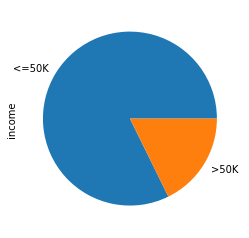

In [50]:
result.income.value_counts().plot(kind='pie')

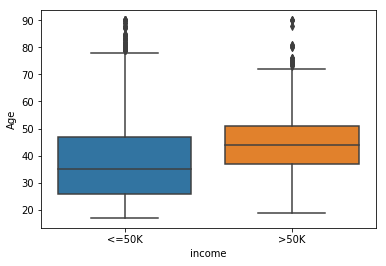

In [51]:
sns.boxplot(x=result.income, y=test.Age)

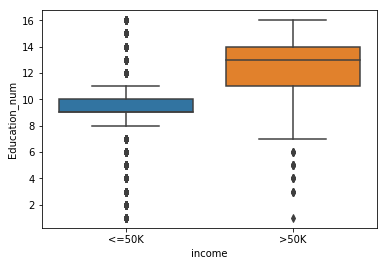

In [52]:
sns.boxplot(x=result.income, y=test.Education_num)

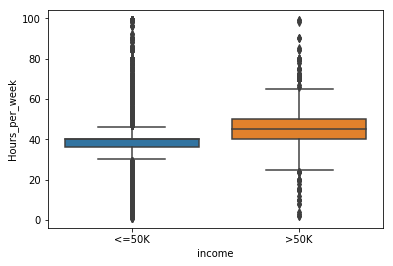

In [53]:
sns.boxplot(x=result.income, y=test.Hours_per_week)

Os boxplots nos mostram que os dados classificados repetem o padrão observado na base de treino